# Artificial Neural Network

**Netural Network** is bascially a system that tries to output desired results from the given features by mimicking how brain works. There are many components in this system, such as **neurons**, **weights**. And **ANN is the most basic neural network** in deep learning.

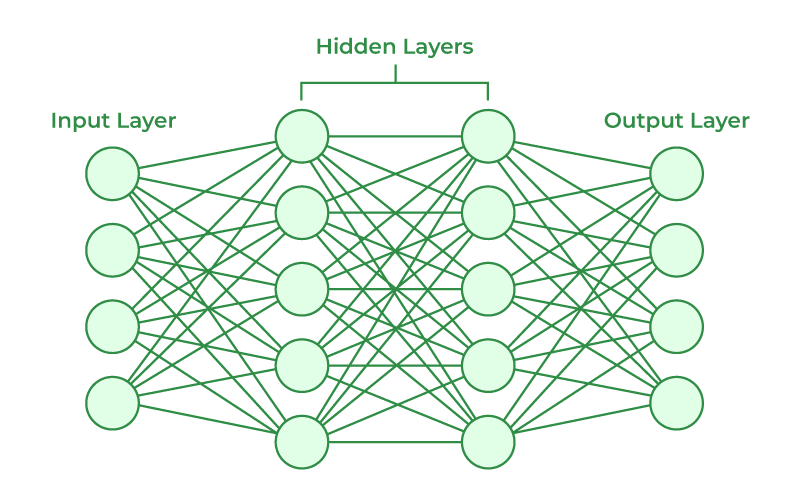

## How does it work <br>
There are two basic stages of this process: **forward and backward propagation.**

### Forward Propagation <br>
ANN has three layers: **input, hidden, and output layer**

*   **Input Layer**: each node in this layer represents a feature
*   **Weights and Bias**: each node in one layer will be connected to the every node in the next layer and **each connection will have its own weight and bias**.
  *   **Weight**: this number specifies **how important this node is to the connected node** (could be either +/- and the **larger** the weight, the **more impact**), normally denoted as $w_i$
  *   **Bias**: this number specifies **how high the weighted sum needed to be before the neuron starts getting meaningful active**, usually denoted as $b_i$
*   **Activation function**: a function to be chosen to decide **how neuron should activate** for each layer to the next layer (carefully chosen for the situation you are working with)
  *   Normally **hidden layers use the same activation function** while the activation function **for the output layer is dependent on the type of prediction**
  *   The result of computing this function on weighted sum of input will be the input for the nodes in the next layer
  *   Some typical activation function: **Sigmoid function** with $y = \frac{1}{1 + e^{-x}}$, range from 0 to 1.
  *   **Tanh function** with $y = \frac{2}{1 + e^{-2x}} + 1$, range from -1 to 1.
  *   **Relu function** with $y = max(x, 0)$, range from 0 to inf.
*   **Hidden Layer**: Each hidden layer calculates the **weighted sum** of input for each node and then **put them in an activation function** and then the result of this will be input for the node in next layer.
*   **Output Layer**: The result of this process resulted from chosen activation function. Result gets improved by **back propagation**.



### Back propagation <br>
At the beginning, **all weights and biases for each connection will be randomly initialized** (usually close to 0) and by doing forward propagation, we get our first result and we gonna improve it using this technique.

*   **Cost or loss function**: a function calculates the d**ifference between the predicted value and actual value**
  *   **Mean Squared Error**: $\frac{1}{n}Σ^n_{i=1}(y_i - \hat{y_i})^2$, usually for **regression problem**
  *   **Binary Cross-Entropy**: $-\frac{1}{N}Σ^N_{i=1}y_i * log(p(y_i)) + (1 - y_i) * log(1 - p(y_i))$, usually for **classification problem with two category** <br>

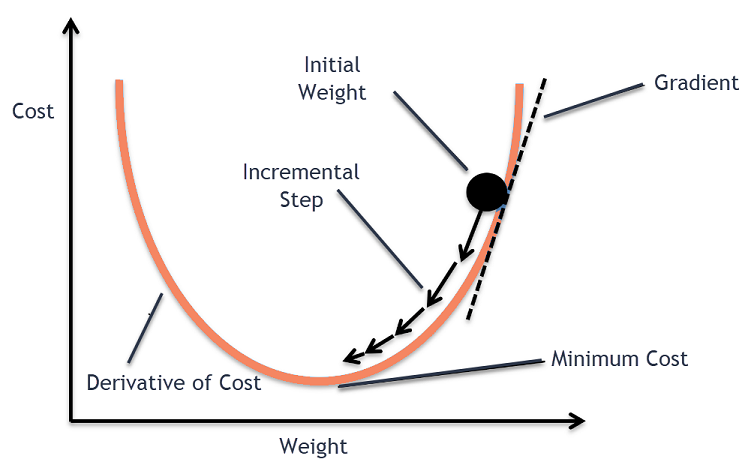

### After getting a loss, how do we use this information to improve the prediction by changing $w_i$ and $b_i$ <br>
We would use certain **Optimizer** to do so and here is one example.

*   **Gradient Descent**: In order to achieve above goal, **for each sample**, we need to **compute the partial derivative for each $w_i$ and $b_i$ in the cost function** and find the **slop** at that point in which this slopes will indicate how fast it will converge to the **minimum point of function**(our goal) and **apply the change by adding -slop**(the reason we apply negative gradient change to our weight and bias is that **we want it to go the opposite direction in order to reach the minimum**).
  *   One issue related to this is that **it may only find the local minimum instead of global minimum**; thus, we may use below method to solve this problem
  *   **Stochastic Gradient Descent**: by **randomly shuffle the trainning set each time**, instead of updating $w_i$ and $b_i$ each sample, we may **update them only after a certain number of sample** by calculating the **average change** to each $w_i$ and $b_i$
*   **Simple example of back propagation with maths behind it**:
  *   Say there is neural network having the **sigmoid as activation function** and **MSE as cost function** and considering only the last two layers with only one node in each layer, $a^{L-1}$ to $a^{L}$, and for one single sample, we have the **cost function** $C_0 = (a^L - y)^2$, and the **weighted sum** $z^L = w^La^{L-1}+b^L$, and the **result** will be $a^L=σ(z^L)$
  *   To calculate the slop of $w^L$, we will have partial derivation $\frac{∂C_0}{∂w^L}$, in order to solve this, we will use **chain rule**
  *   Then, we will have $\frac{∂C_0}{∂w^L} = \frac{∂z^L}{∂w^L}\frac{∂a^L}{∂z^L}\frac{∂C_0}{∂a^L} = a^{L-1}σ^{'}(z^L)2(a^L-y)$
  *   Similarly, for each partial derivative before the layer $a^{L-1}$, **we can calculate the partial derivate of this partial derivate** and this goes on until calculating all the negative gradients. Then apply the changes or calculate the average until a batch size is reached.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [6]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [7]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

One Hot Encoding the "Geography" column

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [16]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

### Adding the second hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

### Adding the output layer

In [19]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [21]:
# optimizer is method used to change attributes of network such as weight in order to reduce the losses
# lost is how you decides to calculate the loss function (or cost function)
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [22]:
# batch_size is a hyperparameter that specifies the number of samples to work through before updating the network
# epochs is a hyperparameter that specifies the number of iterations of running entire trainnign set that is
# one epoch means running entire trainning set once
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 4s 8ms/step - loss: 0.6026 - accuracy: 0.6858
Epoch 2/100
250/250 [==============================] - 3s 11ms/step - loss: 0.4570 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 2s 9ms/step - loss: 0.4400 - accuracy: 0.7977
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4265 - accuracy: 0.8119
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4126 - accuracy: 0.8223
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4007 - accuracy: 0.8301
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3883 - accuracy: 0.8401
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.8445
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3648 - accuracy: 0.8495
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3576 - accur

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

In [25]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 38ms/step
[[False]]


**Important note:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [27]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 4ms/step


### Making the Confusion Matrix

0.8525

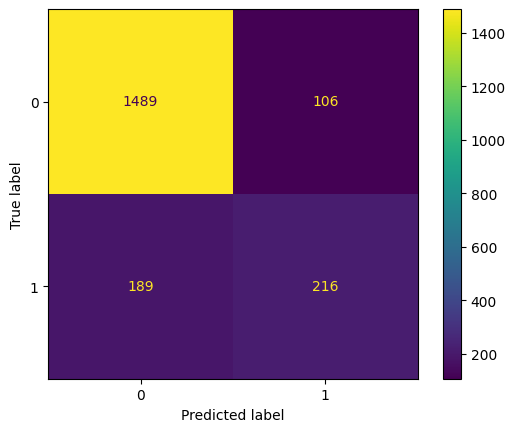

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot()
accuracy_score(y_test, y_pred)